# Wine Quality

 Citation: This dataset is publicly available for research. The details are described in [Cortez et al., 2009].
 Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016 [Pre-press (pdf) http://www3.dsi.uminho.pt/pcortez/winequality09.pdf [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

Data: Two datasets containing details about red and white variants of the Portuguese “Vinho Verde” wine, with their physicochemical features.

## Importing the required packages

In [1]:
import numpy as np
# NumPy is the fundamental package for scientific computing with Python. For more info: https://numpy.org/

import pandas as pd
# pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools
# Documentation: https://pandas.pydata.org/pandas-docs/stable/

import matplotlib.pyplot as plt
# Matplotlib is a Python 2D plotting library which produces figures in a variety of hardcopy formats. 
# Documentation: https://matplotlib.org/3.1.1/index.html

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import pandas_profiling

## Read the Datasets

We use pandas to read the datasets in .csv/.xslx format(s)

In [3]:
df1 = pd.read_csv("winequality-red.csv",sep=";")
df2 = pd.read_csv("winequality-white.csv",sep=";")

In [44]:
df1['color'] = 'Red'
df2['color'] = 'White'

In [45]:
df1.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   Red  
1      9.8        5   Red  
2      9.8        5   Red  
3      9.8        6   Red  
4      9.4        5   Red

## Merge the datasets

In [46]:
df = df1.append(df2)

##  Data Cleaning

In [47]:
# check for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

## Summary of the dataset

In [48]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   Red  
1      9.8        5   Red  
2      9.8        5   Red  
3      9.8        6   Red  
4      9.4        5   Red

In [49]:
df.to_csv('Wine_quality_Data.csv')
# data.to_excel('Wine_quality_Data.xlsx')

In [50]:
pandas_profiling.ProfileReport(df)

In [51]:
# check descriptive statistics
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [27]:
# check number of unique values in the 'quality' column
df["quality"].unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

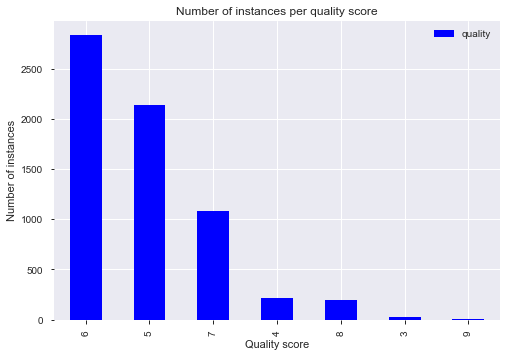

In [30]:
# make a bar plot
df["quality"].value_counts().plot.bar(color='Blue')
plt.xlabel("Quality score")
plt.ylabel("Number of instances")
plt.title("Number of instances per quality score")
plt.legend()

In [31]:
# recode the outcome variable quality to binary 
df['good/bad'] = np.where(df['quality']<= 5, 'bad', 'good')

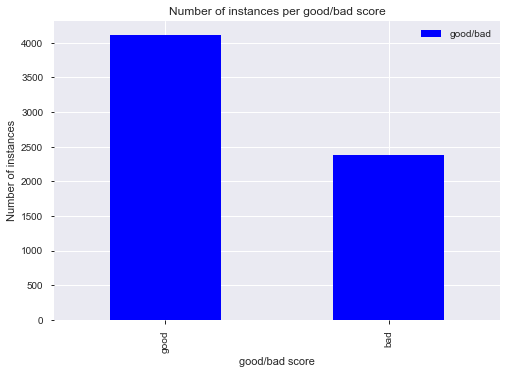

In [32]:
# make a bar plot
df["good/bad"].value_counts().plot.bar(color='Blue')
plt.xlabel("good/bad score")
plt.ylabel("Number of instances")
plt.title("Number of instances per good/bad score")
plt.legend()

In [33]:
# check the dimensions
df.shape

(6497, 14)

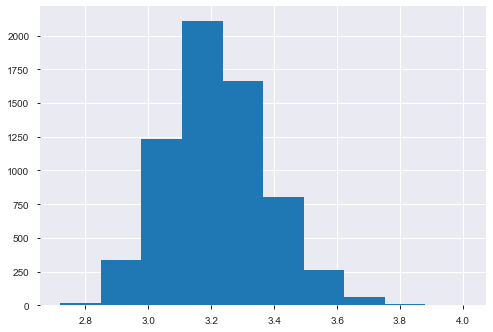

In [34]:
df.pH.hist()

## Scaling the data

In [35]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
# Separating out the features
x = df.loc[:, features].values
y = df.loc[:,['good/bad']].values
x_scaled = StandardScaler().fit_transform(x)
df_scaled = pd.DataFrame(x_scaled)
df_scaled['good/bad'] = y
df_scaled.columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'good/bad']

In [37]:
df_scaled.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.142473          2.188833    -2.192833       -0.744778   0.569958   
1       0.451036          3.282235    -2.192833       -0.597640   1.197975   
2       0.451036          2.553300    -1.917553       -0.660699   1.026697   
3       3.073817         -0.362438     1.661085       -0.744778   0.541412   
4       0.142473          2.188833    -2.192833       -0.744778   0.569958   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -1.100140             -1.446359  1.034993  1.813090   0.193097   
1            -0.311320             -0.862469  0.701486 -0.115073   0.999579   
2            -0.874763             -1.092486  0.768188  0.258120   0.797958   
3            -0.762074             -0.986324  1.101694 -0.363868   0.327510   
4            -1.100140             -1.446359  1.034993  1.813090   0.193097   

    alcohol good/bad  
0 -0.915464      bad  
1 -0.580068      bad  
2 -0.580068      bad  
3 -0.580068     good  
4 -0.915464      bad

In [36]:
#import seaborn as sns
#sns.set(style="ticks")
#sns_plot = sns.pairplot(df_scaled, hue="good/bad", height=2)
#sns_plot.savefig("plot.png")

## Making plotly plot/dash

In [38]:
import plotly.offline as pyo
import plotly.graph_objs as go
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

In [39]:
app = dash.Dash()
 
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
 
app.layout = html.Div([
    html.Div([
        html.Div([
            dcc.Dropdown(
                id='xaxis',
                options=[{'label': i, 'value': i} for i in features],
                value='displacement'
            )
        ],
        style={'width': '48%', 'display': 'inline-block'}),
 
        html.Div([
            dcc.Dropdown(
                id='yaxis',
                options=[{'label': i, 'value': i} for i in features],
                value='acceleration'
            )
        ],style={'width': '48%', 'float': 'right', 'display': 'inline-block'})
    ]),
 
    dcc.Graph(id='feature-graphic')
], style={'padding':10})
 
@app.callback(
    Output('feature-graphic', 'figure'),
    [Input('xaxis', 'value'),
     Input('yaxis', 'value')])
def update_graph(xaxis_name, yaxis_name):
    return {
        'data': [go.Scatter(
            x=df_scaled[xaxis_name],
            y=df_scaled[yaxis_name],
            text=df_scaled['good/bad'],
            mode='markers',
            marker={
                'size': 9,
                'color': df_scaled['good/bad'].map({'good': 'green', 'bad': 'red'}),
                'opacity': 0.9,
                'line': {'width': 0.5, 'color': 'white'}
            }
        )],
        'layout': go.Layout(
            xaxis={'title': xaxis_name},
            yaxis={'title': yaxis_name},
            margin={'l': 40, 'b': 40, 't': 10, 'r': 0},
            hovermode='closest'
        )
    }
 
if __name__ == '__main__':
    app.run_server()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [30/Oct/2019 18:47:14] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [30/Oct/2019 18:47:15] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [30/Oct/2019 18:47:15] "GET /_dash-dependencies HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\pandas\core\indexes\base.py", line 2897, in get_loc
    return self._engine.get_loc(key)
  File "pandas\_libs\index.pyx", line 107, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 131, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 1607, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 1614, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'displacement'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "D:\Anaconda\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "D:\Anacond

127.0.0.1 - - [30/Oct/2019 18:47:15] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [30/Oct/2019 18:47:15] "GET /_favicon.ico HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\pandas\core\indexes\base.py", line 2897, in get_loc
    return self._engine.get_loc(key)
  File "pandas\_libs\index.pyx", line 107, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 131, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 1607, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 1614, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'acceleration'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "D:\Anaconda\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "D:\Anacond

127.0.0.1 - - [30/Oct/2019 18:47:18] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [30/Oct/2019 18:47:20] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [30/Oct/2019 18:47:23] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [30/Oct/2019 18:47:29] "POST /_dash-update-component HTTP/1.1" 200 -


## Clustering

In [47]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
labelEncoder.fit(y)
y = labelEncoder.transform(y)

C:\Users\20194136\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\20194136\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [48]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2) # You want cluster the passenger records into 2: good or bad
kmeans.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [49]:
correct = 0
for i in range(len(x_scaled)):
    predict_me = np.array(x_scaled[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(x_scaled))

0.3810420590081607


## PCA

In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_scaled)

In [51]:
print(pca.components_)

[[ 0.49127031 -0.32097754  0.51527841  0.12708813  0.21264362 -0.04223191
   0.00180864  0.16415086 -0.46702158  0.28587518 -0.01342656]
 [-0.08481356  0.1515305  -0.05602221  0.31154622  0.16037879  0.58709254
   0.61721767  0.20411907 -0.04176028  0.04378009 -0.27011805]]


In [57]:
print(pca.explained_variance_ratio_)

[0.25452886 0.17192216]


In [58]:
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['principal component 1', 'principal component 2'])

In [59]:
finalDf = pd.concat([principalDf, df_scaled[['good/bad']]], axis = 1)

<IPython.core.display.Javascript object>


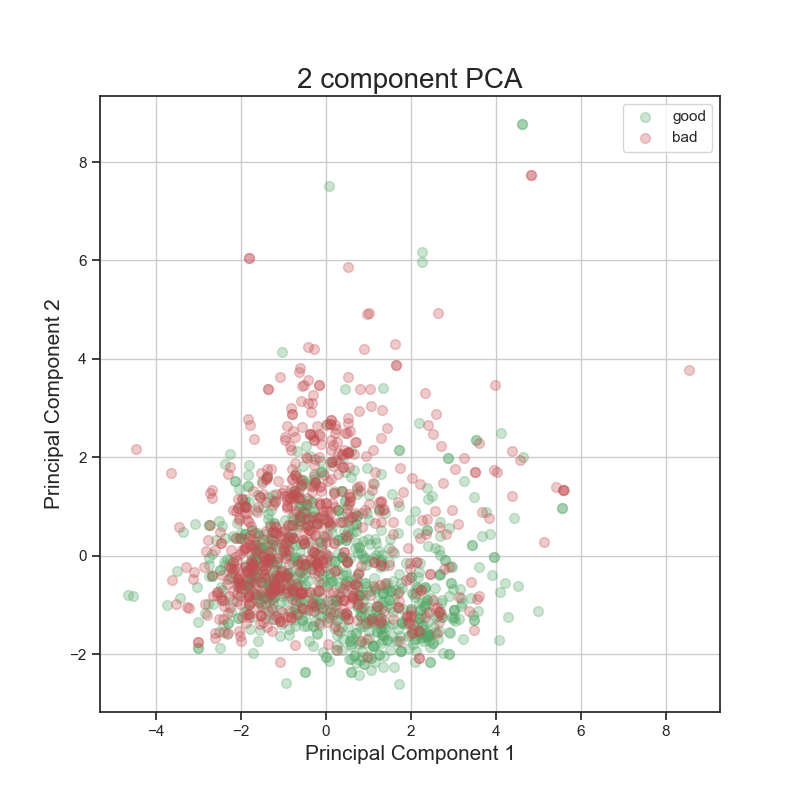

In [60]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['good', 'bad']
colors = ['g', 'r']
alpha = ['.3','.3']
for target, color, alpha in zip(targets,colors, alpha):
    indicesToKeep = finalDf['good/bad'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50 , alpha = alpha)
ax.legend(targets)
ax.grid()

<IPython.core.display.Javascript object>


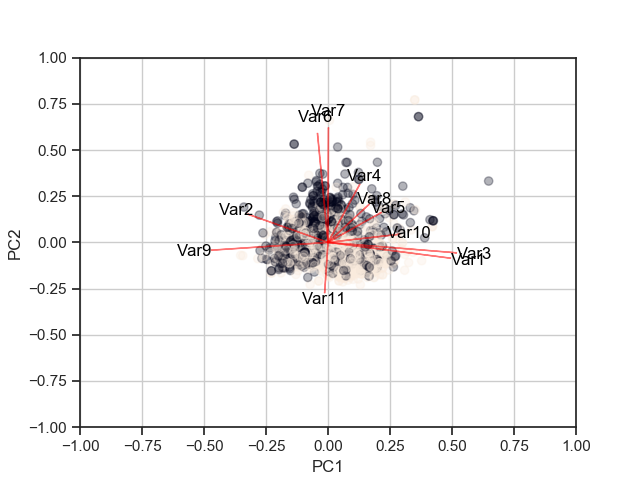

In [70]:
%matplotlib notebook
x_new = principalComponents

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y, alpha=.3)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'red',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'black', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'black', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()